In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




In [2]:
df=pd.read_csv('advertising.csv')
df

Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

Droping the first column because its just a serial number

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

EDA

In [6]:
df.shape

(200, 4)

In [7]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

They spend more money on TV advertisement

<AxesSubplot:>

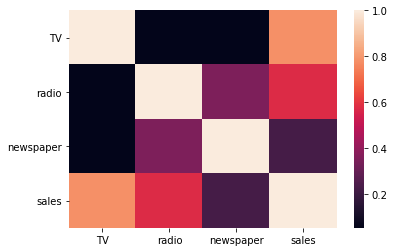

In [11]:
sns.heatmap(df.corr())

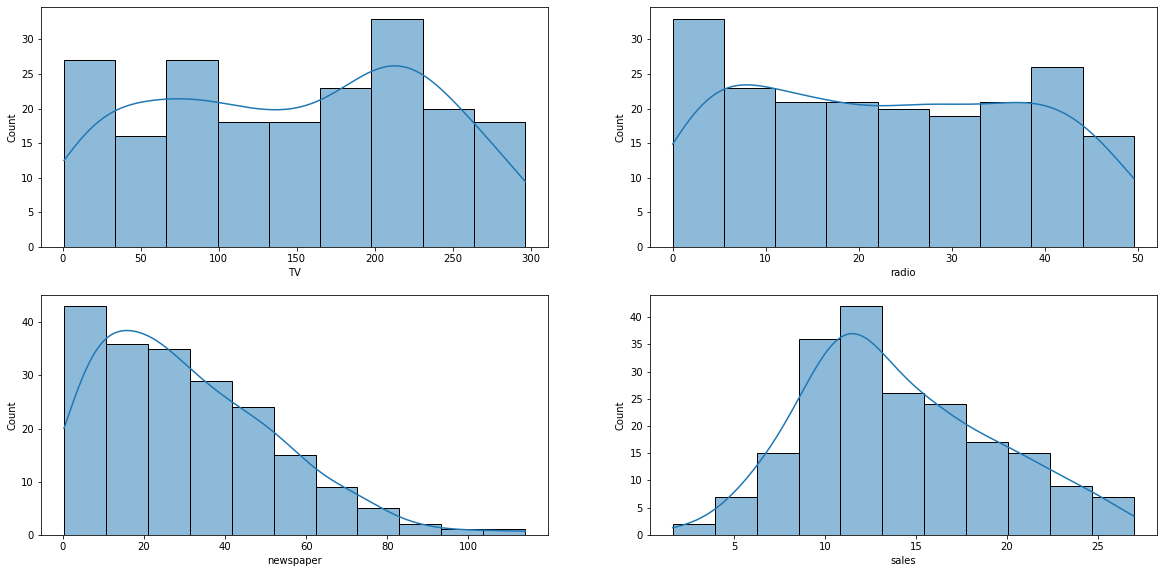

In [12]:
plt.figure(figsize=[20,15])
for i,column in enumerate(df.columns):
    plt.subplot(3,2,i+1)
    sns.histplot(df[column],kde=True)


we can see that sales data to normaly distributed but newspaper data seems right skewed

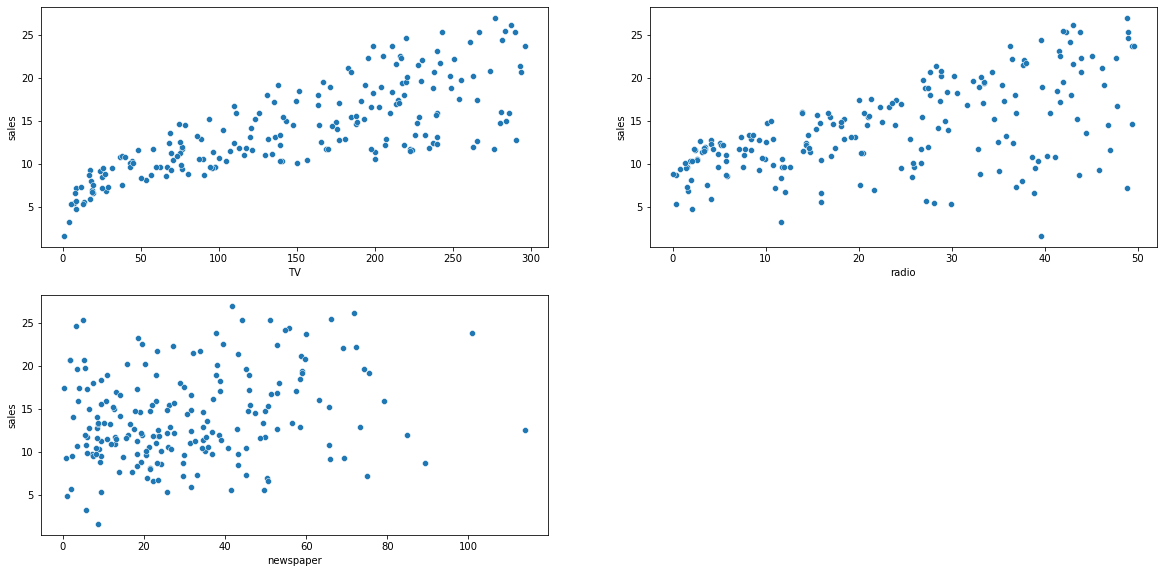

In [13]:
plt.figure(figsize=(20,15))
for i, column in enumerate(df.drop('sales',axis=1).columns):
    plt.subplot(3,2,i+1)
    sns.scatterplot(df[column],df['sales'])

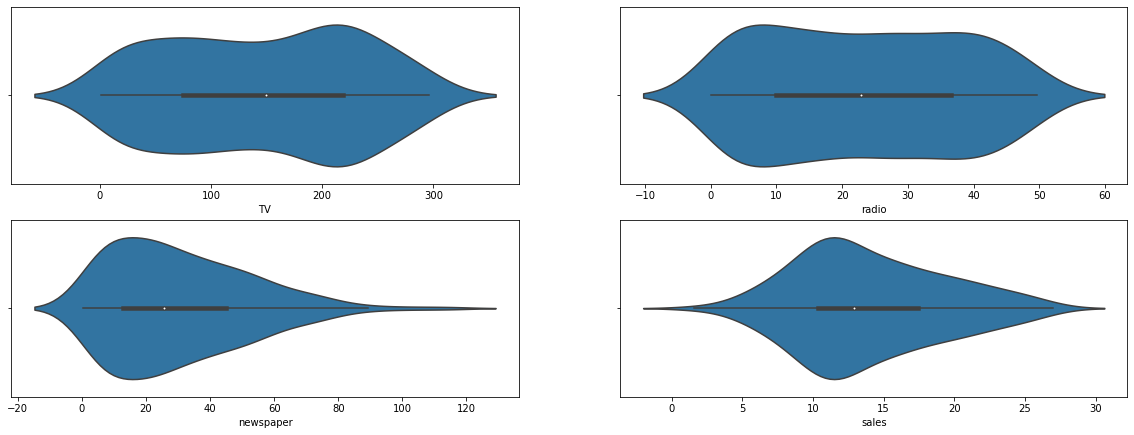

In [14]:
plt.figure(figsize=[20,15])
for i, column in enumerate(df.columns):
    plt.subplot(4,2,i+1)
    sns.violinplot(df[column])

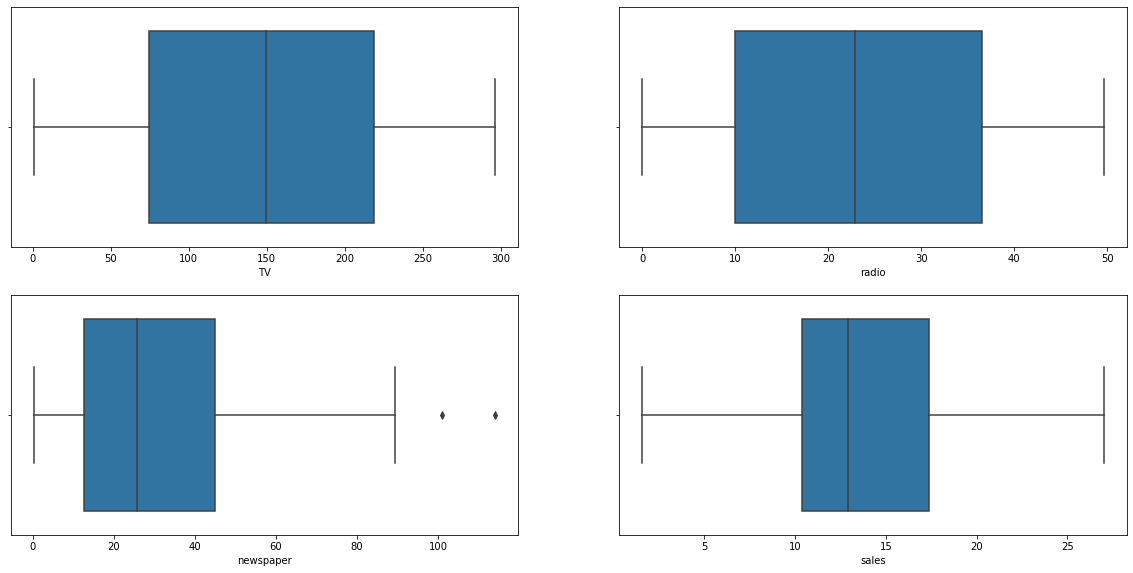

In [15]:
plt.figure(figsize=(20,15))
for i, column in enumerate(df.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[column])

We can see there is no outlier in TV radio and sales but there are few in news paper so let's remove it

In [18]:
abs_zscore = np.abs(stats.zscore(df))
abs_zscore

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [19]:
df[abs_zscore>3].index

Int64Index([16, 101], dtype='int64')

In [20]:
df.shape

(200, 4)

In [21]:
df.drop(df[abs_zscore>3].index,axis=0,inplace=True)

In [22]:
df.shape

(198, 4)

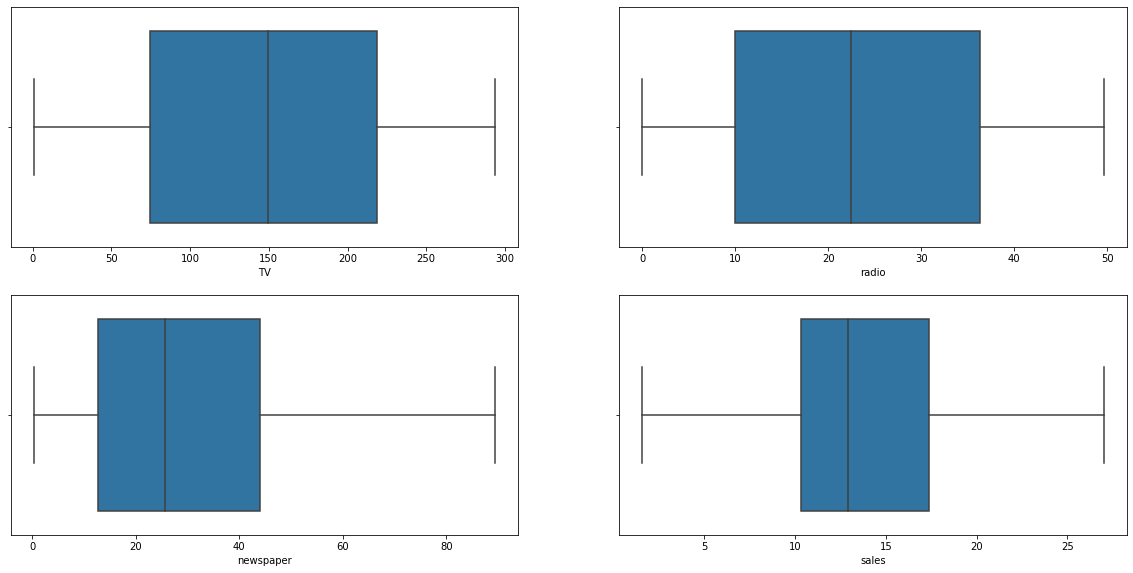

In [23]:
plt.figure(figsize=(20,15))
for i, column in enumerate(df.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[column])

we have successfully removed the outliers

# Checking VIF

In [24]:
X = df.drop('sales',axis=1)

In [25]:
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

VIF    columns
1  3.275285      radio
2  3.126386  newspaper
0  2.502183         TV

We can see the VIF for all column is less than the 10 so there is very less colinerity in the data so leaving it

# Checking Skewness

In [26]:
df.skew().abs().sort_values()

TV           0.082332
radio        0.114842
sales        0.407130
newspaper    0.650112
dtype: float64

we can see there is skewness a data so lets remove it with Power Transformation

In [27]:
df_transformed = PowerTransformer(method='yeo-johnson',).fit_transform(df)
df = pd.DataFrame(df_transformed,columns=df.columns)
df

TV     radio  newspaper     sales
0    0.955983  0.969110   1.604196  1.476664
1   -1.192003  1.046234   0.831044 -0.645180
2   -1.646125  1.372968   1.607052 -0.889458
3    0.142934  1.147332   1.283768  0.892431
4    0.456452 -0.735026   1.280622 -0.127879
..        ...       ...        ...       ...
193 -1.288311 -1.423941  -0.687435 -1.292322
194 -0.521579 -1.287689  -1.146090 -0.799286
195  0.416577 -0.862474  -1.314437 -0.147694
196  1.467535  1.182269   1.517395  1.990554
197  0.975625 -0.924437  -1.091084 -0.029786

[198 rows x 4 columns]

In [28]:
df.skew().abs().sort_values()

sales        0.007573
newspaper    0.101288
radio        0.236668
TV           0.320682
dtype: float64

We removed the skewness from data  and also scaled it

# Train Test Split

In [29]:
X = df.drop('sales',axis=1)

In [30]:
y = df['sales']

In [31]:
print(X.shape)
print(y.shape)

(198, 3)
(198,)


In [32]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42,shuffle=True)

In [33]:
print(X_train.shape)
print(y_train.shape)

(148, 3)
(148,)


In [34]:
print(X_test.shape)
print(y_test.shape)

(50, 3)
(50,)


# Model Building

# LinearRegression

In [35]:
linearRegression = LinearRegression()

In [36]:
linearRegression.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = linearRegression.predict(X_test)
y_pred

array([-1.07250038, -0.21778534,  1.69294721, -0.85456138, -0.8262151 ,
        1.27224523,  1.04195218, -0.29927942,  0.14062724,  0.66300105,
        0.20498389,  1.24317581, -1.14392689, -0.10991305, -1.4967159 ,
       -0.79931831, -0.82767497, -0.27827023, -0.77180553, -0.40856672,
       -0.10632759,  0.56924173,  1.62241458, -1.53876991,  0.66037069,
        1.24929196, -1.13146748,  0.18659002, -1.39042937, -0.19242815,
        0.81107687,  0.0225913 , -1.56336893,  0.01753446,  0.24020071,
        0.69494157,  0.36792848, -0.32091001,  0.9142349 ,  0.50557908,
        0.86427036, -0.524256  , -0.27552401, -0.77625943, -1.47503492,
       -1.27216425,  0.59578517,  0.49663806, -0.65224991,  1.50980922])

In [38]:
mean_absolute_error(y_test,y_pred)

0.23960063196900594

In [39]:
mean_squared_error(y_test,y_pred)

0.1055737577918904

In [40]:
r2_score(y_test,y_pred)

0.8989352111755063

# Ridge Regression

In [41]:
ridge = Ridge(alpha=1.0)

In [42]:
ridge.fit(X_train,y_train)

Ridge()

In [43]:
y_pred = ridge.predict(X_test)
y_pred

array([-1.06824948, -0.21621272,  1.68363619, -0.84803201, -0.81911412,
        1.26095196,  1.0359611 , -0.29618806,  0.13920867,  0.6564166 ,
        0.20411184,  1.23675595, -1.13492859, -0.10990212, -1.48757866,
       -0.79306056, -0.82024437, -0.27670549, -0.766912  , -0.40658829,
       -0.10365809,  0.56350477,  1.6135248 , -1.5284652 ,  0.65479133,
        1.24113083, -1.12202213,  0.18876438, -1.38121683, -0.19031057,
        0.80669505,  0.02145705, -1.5544989 ,  0.01832355,  0.23810427,
        0.68763445,  0.36524305, -0.31993094,  0.91003693,  0.5011732 ,
        0.85531452, -0.51762819, -0.27517182, -0.7721701 , -1.46464669,
       -1.26425701,  0.59332755,  0.4918528 , -0.64520472,  1.49729768])

In [44]:
mean_squared_error(y_test,y_pred)

0.10709705239531236

In [45]:
mean_absolute_error(y_test,y_pred)

0.24129072176368344

In [46]:
r2_score(y_test,y_pred)

0.897476975240438

# Lasso

In [47]:
lasso = Lasso()

In [48]:
lasso.fit(X_train,y_train)

Lasso()

In [49]:
y_pred = lasso.predict(X_test)

In [50]:
mean_absolute_error(y_test,y_pred)

0.8535954201758937

In [51]:
mean_squared_error(y_test,y_pred)

1.0499730325589933

In [52]:

r2_score(y_test,y_pred)

-0.0051295419091264005

# Decision Tree Regressor

In [53]:
decisionTreeRegressor = DecisionTreeRegressor()

In [54]:
decisionTreeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred = decisionTreeRegressor.predict(X_test)

In [56]:
mean_absolute_error(y_test,y_pred)

0.18171608800472225

In [57]:
mean_squared_error(y_test,y_pred)

0.04845354477098121

In [58]:

r2_score(y_test,y_pred)

0.9536158665515123

# KneighnorsRegressor

In [59]:
kNeighborsRegressor = KNeighborsRegressor()

In [60]:
kNeighborsRegressor.fit(X_train,y_train)

KNeighborsRegressor()

In [61]:
y_pred = kNeighborsRegressor.predict(X_test)

In [62]:
mean_absolute_error(y_test,y_pred)

0.24207283519245415

In [63]:
mean_squared_error(y_test,y_pred)

0.12494629139297254

In [64]:
r2_score(y_test,y_pred)

0.8803900626619127

# SVR

In [65]:
svr = SVR()

In [66]:
svr.fit(X_train,y_train)

SVR()

In [67]:
y_pred = svr.predict(X_test)

In [68]:
mean_absolute_error(y_test,y_pred)

0.15543651416449258

In [69]:
mean_squared_error(y_test,y_pred)

0.06350634559162346

In [70]:
r2_score(y_test,y_pred)

0.9392059585594693

We can see we are geting very good accuracy with SVR and DecisionTreeRegressor so checking Cross validation for both

Cross valdiaton for SVR

In [71]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)

In [ ]:
scores = cross_val_score(SVR(),X,y,cv=kFold,scoring='r2',n_jobs=100,)
scores

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 555, in run
    result_item, is_broken, bpe = self.wait_result_broken_or_wakeup()
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 609, in wait_result_broken_or_wakeup
    ready = wait(readers + worker_sentinels)
  File "C:\Users\dell\anaconda3\lib\multiprocessing\connection.py", line 879, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\Users\dell\anaconda3\lib\multiprocessing\connection.py", line 811, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 101
